<center><h1>Olimpiadas</h1></center>

## Enunciado

Esta actividad se deberá entregar como enlace de GitHub, es decir, tendréis que tener subido el notebook con sus explicaciones, resultados y código a vuestro portfolio del Git (os recomiendo que vayáis subiendo diferentes actividades que hemos hecho durante el curso).

Esta actividad se centra principalmente en que hagáis los diferentes test de hipotesis de un tema que os interese:

- Hipótesis respecto a un valor.

- Hipótesis respecto dos muestras independientes.

- Hipótesis varias categorías.

- Hipótesis dos muestras relacionadas.

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Dataset
df_olimpiadas = pd.read_csv('olympic_games.csv')
display(df_olimpiadas)

,year,games_type,host_country,host_city,athletes,teams,competitions,country,gold,silver,bronze
0,2022,Winter,China,Beijing,2834,91,109,Australia,1,2,1
1,2022,Winter,China,Beijing,2834,91,109,Austria,7,7,4
2,2022,Winter,China,Beijing,2834,91,109,Belarus,0,2,0
3,2022,Winter,China,Beijing,2834,91,109,Belgium,1,0,1
4,2022,Winter,China,Beijing,2834,91,109,Canada,4,8,14
...,...,...,...,...,...,...,...,...,...,...,...
1776,1896,Summer,Greece,Athens,241,14,43,Hungary,2,1,3
1777,1896,Summer,Greece,Athens,241,14,43,Mixed team,1,0,1
1778,1896,Summer,Greece,Athens,241,14,43,Switzerland,1,2,0
1779,1896,Summer,Greece,Athens,241,14,43,United Kingdom,3,3,3


### Hipotesis respecto a un valor

El equipo cree que de media, participan alrededor de 6000 atletas. Es cierto?

6135.094329028636


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.462229,1780,two-sided,0.143855,"[5953.89, 6316.3]",0.034648,0.078,0.309369


----------------------------------------------------------------
La hipotesis demuestra que no existe una diferencia significativa entre la prognosticada y la real


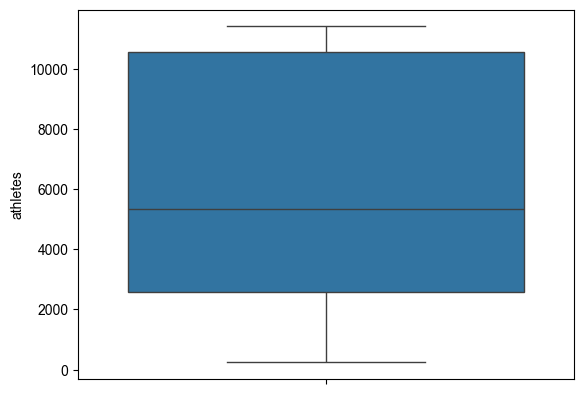

In [2]:
sns.boxplot(df_olimpiadas['athletes'], legend=True)
sns.set()

# Media de atletas
print(df_olimpiadas['athletes'].mean())

# Realizamos un test de hipotesis
# Hipotesis 0 (Ho: atletas == 6000) 
# Hipotesis 1 (H1: atletas != 6000) 

test_result = pg.ttest(df_olimpiadas['athletes'], 6000, alternative='two-sided')
display(test_result)

print('----------------------------------------------------------------')
print('La hipotesis demuestra que no existe una diferencia significativa entre la prognosticada y la real')

### Hipotesis entre dos muestra independientes

Parece que las Medallas de oro de verano son mas (cantidad), que los de invierno (Verano e Invierno).

4.106796116504855
2.658371040723982
----------------------------------------------------------------
La hipotesis demuestra que no existe una diferencia significativa entre la prognosticada y la real


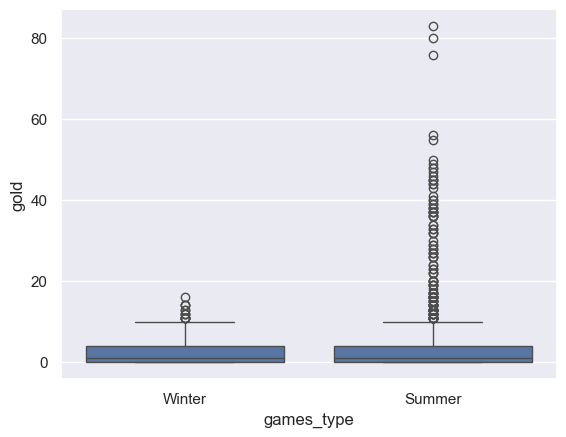

In [3]:
verano = df_olimpiadas[df_olimpiadas['games_type'] == 'Summer']['gold']
invierno = df_olimpiadas[df_olimpiadas['games_type'] == 'Winter']['gold']

sns.boxplot(data=df_olimpiadas, x=df_olimpiadas['games_type'], y=df_olimpiadas['gold'], legend=True)
plt.title('')
sns.set()

print(verano.mean())
print(invierno.mean())

print('----------------------------------------------------------------')
print('La hipotesis demuestra que no existe una diferencia significativa entre la prognosticada y la real')

In [4]:
# Realizamos un test de hipotesis
# Hipotesis 0 (Ho: summer = winter) X
# Hipotesis 1 (H1: summer > winter) OK

test_result = pg.ttest(verano, invierno, alternative='greater')
display(test_result)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.239475,1758.483821,greater,9.020996e-08,"[0.99, inf]",0.192253,8.796e+04,0.968447


### Hipótesis varias categorías.

Se dice que dependiendo del pais anfitrion cambia el numero de atletas que participan. Es cierto?

,Source,ddof1,ddof2,F,p-unc,np2
0,host_country,25,1755,80.245247,1.329545e-268,0.533385


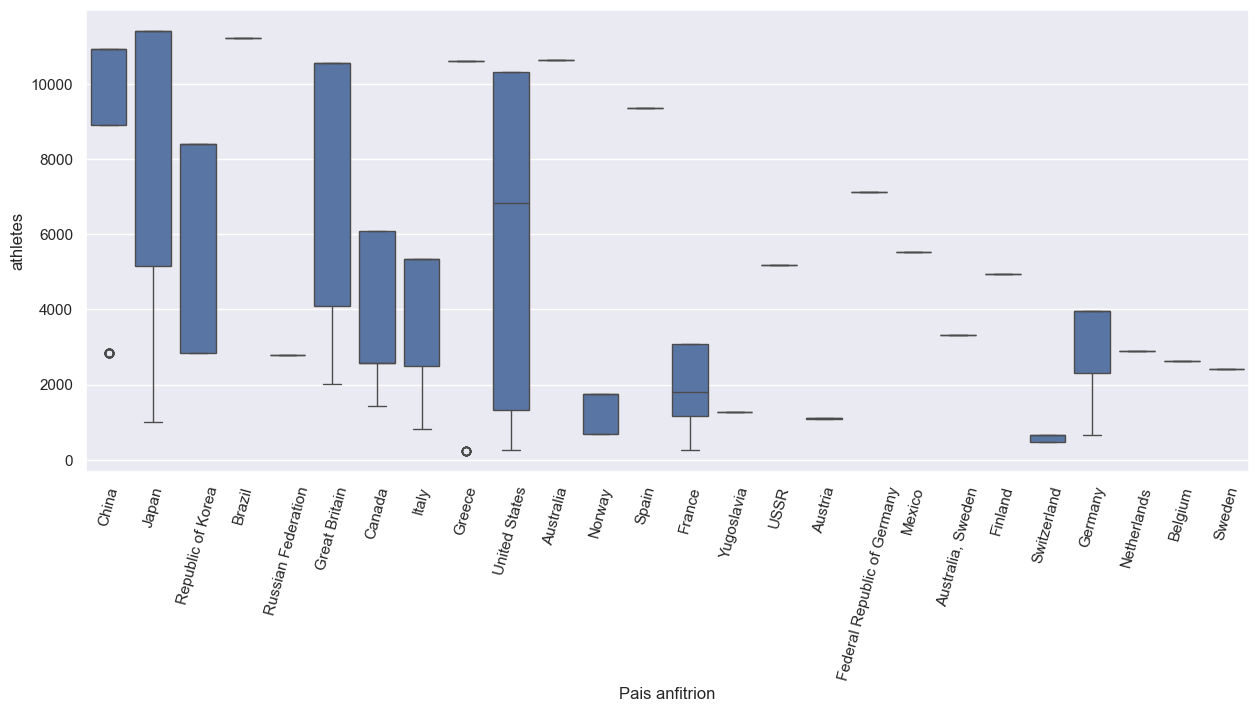

In [37]:
# BOXPLOT
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=df_olimpiadas, x=df_olimpiadas['host_country'], y=df_olimpiadas['athletes'], ax=ax, legend=True)
plt.xticks(rotation=75)
plt.xlabel('Pais anfitrion')
sns.set()

In [39]:
# Media de atletas por pais anfitrion
# print(df_olimpiadas.groupby('host_country')['athletes'].mean())

# Hipótesis Nula (H0): No hay diferencia significativa en el número promedio de atletas participantes entre los Juegos Olímpicos celebrados en diferentes países.
# Hipótesis Alternativa (H1): Existe una diferencia significativa en el número promedio de atletas entre los Juegos Olímpicos celebrados en diferentes países.

# Realizamos un test de hipotesis
# Hipotesis 0 (Ho: host_country = athletes) X
# Hipotesis 1 (H1: host_country > athletes) OK

anova_result = pg.anova(data=df_olimpiadas, dv='athletes', between='host_country')
display(anova_result)

,Source,ddof1,ddof2,F,p-unc,np2
0,host_country,25,1755,80.245247,1.329545e-268,0.533385


### Hipotesis de dos muestras relacionadas

Es más grande el número de medallas ganadas por los atletas del país anfitrión en comparación con otras ediciones?

In [38]:

# Sacamos los valores de ediciones distintas
df_2020 = df_olimpiadas[df_olimpiadas['year'] == 2020]['gold']
df_2022 = df_olimpiadas[df_olimpiadas['year'] == 2022]['gold']

# Media de ambos años
# print(df_2020.mean())
# print(df_2022.mean())

test_result = pg.ttest(df_2020, df_2022, paired=True, alternative='greater')

display(test_result)

print('Tomando en cuenta el resultado, se ve que el numero de medallas de oro se ha incrementado levemente (2022) a comparación con el año anterior (2020).')

c:\Python311\Lib\site-packages\pingouin\parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.097346,81.571026,greater,0.538655,"[-1.86, inf]",0.015895,0.447,0.042792


Tomando en cuenta el resultado, se ve que el numero de medallas de oro se ha incrementado levemente (2022) a comparación con el año anterior (2020).
